## Joining bibliography files into one


In [33]:
# List of file paths
file_paths = ['..\\txt\\pearcy_examples.txt','..\\txt\\bowell.txt', '..\\txt\\lamb_et_al.txt','..\\txt\\o_connell_examples.txt', '..\\txt\\whatabout_defended_examples.txt',  '..\\txt\\techniques_dataset.txt'] #'..\\txt\\windsor_paper_examples.txt',

# Output file path
output_path = "..\\txt\\bibliography_file.txt"

# Open the output file in write mode
with open(output_path, "w", encoding="utf-8") as output_file:
    # Loop through each file path
    for file_path in file_paths:
        # Open each input file in read mode
        with open(file_path, "r", encoding="utf-8") as input_file:
            # Read the content of the input file
            file_content = input_file.read()
            
            # Write the content to the output file
            output_file.write(file_content)
            
            # Add a newline to separate the content of different files
            output_file.write("\n")


## Joining examples into a result file

In [8]:
import re
file_paths = ['..\\txt\\bibliography_file.txt',
              '..\\txt\\cc_100.txt',
               '..\\txt\\chat_gpt.txt',
                 '..\\txt\\sketch_engine.txt', 
                 '..\\txt\\dev_23_semEval.txt', '..\\txt\\train_23_semEval.txt',
                   '..\\txt\\train_2021.txt',
                     '..\\txt\\wikipedia.txt'
                   ] # '..\\txt\\extracted_sem_eval_2021.txt', '..\\txt\\0_extracted_dev_text_23.txt', '..\\txt\\0_extracted_text_23.txt','..\\txt\\0_my_whatabout_23.txt'

# Output file path
output_path = "..\\txt_for_classification\\result_whatabout.txt"

# Open the output file in write mode
with open(output_path, "w", encoding="utf-8", errors="replace") as output_file:
    # Loop through each file path
    for file_path in file_paths:
        # Open each input file in read mode
        with open(file_path, "r", encoding="utf-8", errors="replace") as input_file:
            # Read the content of the input file
            file_content = input_file.read( )

#-------------------------------TEXT CLEANING--------------------------------------------------
            
            # Replace double quotes and curly apostrophes with empty strings
            file_content = file_content.replace('"', '')

            # Replace square brackets and other special characters with empty string
            file_content = re.sub(r'[\[\]{}\\\/@#$%^&*\-_+="<>`~]', ' ', file_content)

            # Replace typographic single quotes with regular single quotes
            file_content = file_content.replace('‘', "'").replace('’', "'")

#----------------------------------------------------------------------------------------------
            # Write the modified content to the output file
            output_file.write(file_content )

            # Add a newline to separate the content of different files
            output_file.write("\n")


# Examining txt data

In [9]:
#let's the load data to RAM
text = open('..\\txt_for_classification\\result_whatabout.txt', 'r', encoding='utf-8').read()  # note that I add an encoding='utf-8' parameter to preserve information
#print(text[:5])

In [10]:
print(f'The file is loaded as datatype: {type(text)} and has {len(text)} characters in it')

The file is loaded as datatype: <class 'str'> and has 86853 characters in it


In [11]:
# how many unique characters do we see? 
# For reference, ASCII has 127 characters in it - so we expect this to have at most 127 characters
unique_chars = list(set(text))
unique_chars.sort()
print(unique_chars)
print(f'There are {len(unique_chars)} unique characters, including both ASCII and Unicode character')

['\n', ' ', '!', "'", '(', ')', ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Á', 'ä', 'é', 'ö', 'а', 'б', 'в', 'г', 'д', 'е', 'к', 'н', 'р', 'я', '–', '—', '“', '”', '…']
There are 92 unique characters, including both ASCII and Unicode character


## Tokenization

In [12]:
words = text.split()
print(len(words))

14466


In [13]:
print(words[0:100])

['put', 'your', 'finger', 'anywhere', 'on', 'a', 'map', 'of', 'the', 'world,', 'and', 'everywhere', 'you', 'will', 'hear', 'complaints', 'that', 'American', 'officials', 'are', 'interfering', 'in', 'internal', 'election', 'processes.', 'There', 'are', 'a', 'lot', 'of', 'killers.', 'You', 'got', 'a', 'lot', 'of', 'killers.', 'What,', 'you', 'think', 'our', 'country', 'is', 'so', 'innocent?', 'Well,', 'I', 'think', 'that', 'our', 'country', 'does', 'plenty', 'of', 'killing,', 'too,', 'Joe.', 'So,', 'you', 'know.', "There's", 'a', 'lot', 'of', 'stupidity', 'going', 'on', 'in', 'the', 'world', 'right', 'now,', 'Joe.', 'A', 'lot', 'of', 'killing', 'going', 'on.', 'A', 'lot', 'of', 'stupidity.', 'And', "that's", 'the', 'way', 'it', 'is.', 'But', 'you', "didn't", 'ask', 'me', 'that', 'question,', 'you', 'asked', 'me', 'a']


## Creation of the xml corpus
This corpus will be used for inserting relevant annotations.

In [14]:
import xml.etree.ElementTree as ET
from xml.dom import minidom

def prettify(elem):
    """Return a pretty-printed XML string for the Element."""
    rough_string = ET.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

def text_to_xml(input_file, output_file):
    # Create the root element for the XML
    root = ET.Element("teiCorpus", version="3.3.0", xmlns="http://www.tei-c.org/ns/1.0")
    corpus_header = ET.SubElement(root, "teiHeader")
    
    # Read the content of the text file with UTF-8 encoding and create TEI elements
    with open(input_file, 'r', encoding='utf-8') as file:
        id=0
        for idx, line in enumerate(file, start=1):
            line = line.strip()
            if line:  # Skip empty lines
                tei_element = ET.SubElement(root, "TEI")
                tei_element.set("document", str(id))

                tei_header = ET.SubElement(tei_element, "teiHeader")
                tei_header.set("document", str(id))
                # Adding fileDesc with titleStmt, publicationStmt, and sourceDesc
                file_desc = ET.SubElement(tei_header, "fileDesc")
                
                title_stmt = ET.SubElement(file_desc, "titleStmt")
                title = ET.SubElement(title_stmt, "title")
                
                title.text=f'document {id}'
                
                publication_stmt = ET.SubElement(file_desc, "publicationStmt")
                publication_p = ET.SubElement(publication_stmt, "p")
                
                publication_p.text='Published in a private Github repository as a part of a Master thesis research project'
                
                source_desc = ET.SubElement(file_desc, "sourceDesc")
                source_p = ET.SubElement(source_desc, "p")
                
                source_p.text='Refer to the thesis documentation for specific information about the sources of the resources'
                
                
                text_element = ET.SubElement(tei_element, "text")
                
                text_element.set("document", str(id))
                text_element.text = line
                id +=1

    # Prettify the XML
    prettified_xml = prettify(root)

    # Write the prettified XML to the output file with UTF-8 encoding
    with open(output_file, 'w', encoding='utf-8') as output_file:
        output_file.write(prettified_xml)

if __name__ == "__main__":
    input_file_path = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\txt_for_classification\\result_whatabout.txt"
    output_file_path = "..\\xml\\tei_result_corpus.xml"
    text_to_xml(input_file_path, output_file_path)


## Binary classification
- We first prepare the data
- then we initialize the TF-IDF vectorizer with default settings and transform the text data into TF-IDF matrices.
- Then, we split the data into training and testing sets.
- Next, we train a Multinomial Naive Bayes classifier on the training data and evaluate its accuracy on the test data.

genism- non negative matrix factorization

In [4]:
# Step 1: Read the plain text file
with open('..\\txt_for_classification\\result_whatabout.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Step 2: Assign a common label to all non-empty lines
common_label = 0  # Replace with your actual label

# Step 3: Combine text and labels, skipping empty lines
combined_data = [(line.strip(), common_label) for line in lines if line.strip()]

# Step 4: Write the combined data to a new file
output_file_path = '..\csv\yes_whatabout_with_labels.csv'  # You can choose any format, e.g., CSV
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write('Text,Label\n')  # Writing header
    for line, label in combined_data:
        line=line.replace('"', '')
        output_file.write(f'"{line}",{label}\n')


In [5]:
# Step 1: Read the plain text file
## with open('..\\txt_for_classification\\no_what_no_semeval.txt', 'r', encoding='utf-8') as file:
with open('..\\txt\\no_what.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Step 2: Assign a common label to all non-empty lines
common_label = 1  # Replace with your actual label

# Step 3: Combine text and labels, skipping empty lines
combined_data = [(line.strip(), common_label) for line in lines if line.strip()]

# Step 4: Write the combined data to a new file
output_file_path = '..\\csv\\no_whatabout_with_labels.csv'  # You can choose any format, e.g., CSV
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write('Text,Label\n')  # Writing header
    for line, label in combined_data:
        line=line.replace('"', '')
        output_file.write(f'"{line}",{label}\n')


In [5]:
import pandas as pd
# Step 1: Combine the CSV files
df_positive = pd.read_csv('..\\csv\\yes_whatabout_with_labels.csv')
df_negative = pd.read_csv('..\\csv\\no_whatabout_with_labels.csv')

df_combined = pd.concat([df_positive, df_negative], ignore_index=True)
df_combined.to_csv('..\\csv\\joined_csv.csv')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
#non negative matrix factorization 



# Preprocess the data
#min_df and max_df for filtering out more frequent words

vectorizer = TfidfVectorizer( ngram_range=(1, 2))
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8908296943231441
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       127
           1       0.84      0.93      0.88       102

    accuracy                           0.89       229
   macro avg       0.89      0.89      0.89       229
weighted avg       0.90      0.89      0.89       229



nota: senza il parametro <code>ngram_range=(1, 2)</code>, l'accuracy è di circa 0.86


# Building a model with the appropriate data splitting - check the proportions
According to NLP standard workflow, data have been splitted in 3 parts: train, development and test
Here are the percentages of the three sets of data:

- Training set (X_train, y_train): 70% of the original data
- Validation set (X_val, y_val): 15% of the original data
- Test set (X_test, y_test): 15% of the original data <br>

So the data is split into 70% training, 15% validation, and 15% test sets.

In [4]:
df_combined=pd.read_csv('..\\csv\\joined_csv.csv')

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer( ngram_range=(1, 2))
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']
# Split the data into training and combined validation-test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the combined validation-test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Now you have X_train_combined, y_train_combined for training,
# X_val, y_val for validation, and X_test, y_test for testing


In [25]:
from sklearn.metrics import accuracy_score

# Train the model on the training set
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict labels for the validation set
y_val_pred = clf.predict(X_val)

# Compute accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

# Predict labels for the test set
y_test_pred = clf.predict(X_test)

# Compute accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')


Validation Accuracy: 0.8953488372093024
Test Accuracy: 0.8662790697674418


## Logaritmic probability difference for extracing differences

In [26]:

# Get the log probabilities of words for each class

log_probabilities = clf.feature_log_prob_


# Calculate the difference in log probabilities for each word

word_diff = log_probabilities[1] - log_probabilities[0] # Assuming binary classification, change the index accordingly


# Get the feature names (words) from the TfidfVectorizer

feature_names = vectorizer.get_feature_names_out()


# Create a dictionary that maps words to their differences in log probabilities

word_diff_dict = dict(zip(feature_names, word_diff))


# Sort the words by their differences in log probabilities

sorted_word_diff = {k: v for k, v in sorted(word_diff_dict.items(), key=lambda item: item[1], reverse=True)}


# Print the top 10 words

print("Top 30 words:")
#creating a list storing the extracted words
#i am doing this because most of them are not useful for this study
# since they are lexical terms belonging to the politics field
# it can be interesting as a datum but it's not useful for the lingustic analysis of the phenomenon
to_exclude=[]
for i, (word, diff) in enumerate(sorted_word_diff.items()):
    to_exclude.append(str(word))
    print(f"{i+1}. Word: {word}, Log Probability Difference: {diff}")

    if i == 30:

        break

Top 30 words:
1. Word: new, Log Probability Difference: 0.9783404472643404
2. Word: ambassador, Log Probability Difference: 0.874445589796327
3. Word: her, Log Probability Difference: 0.8634596375587282
4. Word: notorious, Log Probability Difference: 0.8434924343540757
5. Word: brand, Log Probability Difference: 0.7930356154381837
6. Word: scar, Log Probability Difference: 0.7913756525691458
7. Word: post, Log Probability Difference: 0.7862077338260285
8. Word: outcry, Log Probability Difference: 0.7742653062133655
9. Word: get, Log Probability Difference: 0.7495460884336254
10. Word: eu, Log Probability Difference: 0.7402399118642489
11. Word: uk, Log Probability Difference: 0.7384432275789035
12. Word: ll, Log Probability Difference: 0.7359399080523108
13. Word: group, Log Probability Difference: 0.73239641824137
14. Word: home, Log Probability Difference: 0.7300498032262528
15. Word: through, Log Probability Difference: 0.7246288058802985
16. Word: site, Log Probability Difference: 

<b>These are mostly political terms and are not useful for the study of the phenomenon, but only for information about the context it appears in.</b>

In [51]:
#here is the list of the extracted words
print(to_exclude)

['new', 'ambassador', 'home', 'scar', 'brexit', 'her', 'notorious', 'can', 'through', 'architects', 'brand', 'post', 'outcry', 'get', 'ambassador to', 'll', 'uk', 'group', 'revision', 'after', 'site', 'back', 'architecture', 'new year', 'woody', 'could', 'made', 'had', 'fire', 'scar revision', 'squirming']


## Getting logaritmic probability difference for n-grams

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Combine the CSV files
#df_positive = pd.read_csv('..\\csv\\yes_whatabout_with_labels.csv')
#df_negative = pd.read_csv('..\\csv\\no_whatabout_with_labels.csv')

#df_combined = pd.concat([df_positive, df_negative], ignore_index=True)

# Step 2: Preprocess the data with TF-IDF vectorization and frequent n-grams
vectorizer = TfidfVectorizer( min_df=2, max_df=0.8, ngram_range=(2, 3))  # Adjust parameters as needed
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']

# Step 3: Get the log probabilities of n-grams for each class
log_probabilities = clf.feature_log_prob_


# Step 4: Calculate the difference in log probabilities for each n-gram
ngram_diff = log_probabilities[1] - log_probabilities[0]  # Assuming binary classification, change the index accordingly

# Step 5: Get the feature names (n-grams) from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Step 6: Create a dictionary that maps n-grams to their differences in log probabilities
ngram_diff_dict = dict(zip(feature_names, ngram_diff))

# Step 7: Sort the n-grams by their differences in log probabilities
sorted_ngram_diff = {k: v for k, v in sorted(ngram_diff_dict.items(), key=lambda item: item[1], reverse=True)}

# Step 8: Print the top 10 n-grams
print("Top 30 n-grams:")
for i, (ngram, diff) in enumerate(sorted_ngram_diff.items()):
    print(f"{i+1}. N-gram: {ngram}, Log Probability Difference: {diff}")
    if i == 29:
        break


Top 30 n-grams:
1. N-gram: david faber of, Log Probability Difference: 0.874445589796327
2. N-gram: reflect on that, Log Probability Difference: 0.7930356154381837
3. N-gram: rest of, Log Probability Difference: 0.7207385687091197
4. N-gram: in order to, Log Probability Difference: 0.7120361172404692
5. N-gram: day before it, Log Probability Difference: 0.6777567135039462
6. N-gram: than this year, Log Probability Difference: 0.6741116080913088
7. N-gram: brett kavanaugh, Log Probability Difference: 0.6499025058990959
8. N-gram: in society, Log Probability Difference: 0.6495045563081661
9. N-gram: the indians they, Log Probability Difference: 0.6382010911094778
10. N-gram: one lucky beneficiary, Log Probability Difference: 0.6241128104757347
11. N-gram: mixed up, Log Probability Difference: 0.6064475274879602
12. N-gram: when they, Log Probability Difference: 0.6063038889968926
13. N-gram: personal abuse that, Log Probability Difference: 0.594380456682428
14. N-gram: focus on me, Log P

In [28]:
import pandas as pd

# Step 8: Create DataFrame with top n-grams and their differences in log probabilities
top_ngrams = list(sorted_ngram_diff.keys())[:30]  # Extract top 30 n-grams
top_ngrams_diff = [sorted_ngram_diff[ngram] for ngram in top_ngrams]  # Extract corresponding differences

# Create DataFrame
df_ngrams = pd.DataFrame({'N-grams': top_ngrams, 'Logaritmic Probability Difference': top_ngrams_diff})

# Display DataFrame
df_ngrams


,N-grams,Logaritmic Probability Difference
0,david faber of,0.874446
1,reflect on that,0.793036
2,rest of,0.720739
3,in order to,0.712036
4,day before it,0.677757
5,than this year,0.674112
6,brett kavanaugh,0.649903
7,in society,0.649505
8,the indians they,0.638201
9,one lucky beneficiary,0.624113


From this extraction, we obtain the ngrams that differentiate the 2 corpora. Some of them are not relevant for gaining linguistic information on whataboutism, but nonetheless it can be noticed that some potentially whataboutist n-grams emerge. In particular it is possible to recognise:  
- 'reflect on that'
-  'focus on me' 
- 'that better'
- 'only be'
- solely blame

## Most frequent n-grams in general
this extraction is expected to give as output mostly/solely patterns related with whataboutism

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
'''
# Step 2: Preprocess the data
vectorizer = CountVectorizer(ngram_range=(2, 3),  min_df=2)  # Adjust min_df as needed
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
'''
# Get the most frequent n-grams
feature_names = vectorizer.get_feature_names_out()
word_frequencies = dict(zip(feature_names, X.sum(axis=0).A1))
sorted_word_frequencies = {k: v for k, v in sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)}

# Print the top 10 most frequent n-grams
print("Top 10 most frequent n-grams:")
for i, (word, freq) in enumerate(sorted_word_frequencies.items()):
    print(f"{i+1}. N-gram: {word}, Frequency: {freq}")
    if i == 19:
        break


Top 10 most frequent n-grams:
1. N-gram: what about, Frequency: 21.942733863413796
2. N-gram: of the, Frequency: 19.19057977834688
3. N-gram: in the, Frequency: 18.76070557045785
4. N-gram: about the, Frequency: 15.509745688548342
5. N-gram: but what, Frequency: 12.472661853723773
6. N-gram: what about the, Frequency: 11.745600311959677
7. N-gram: on the, Frequency: 11.220614777189398
8. N-gram: to the, Frequency: 11.066101616118775
9. N-gram: but what about, Frequency: 11.037263220427159
10. N-gram: to criticize, Frequency: 10.435943342972632
11. N-gram: right to, Frequency: 10.234607678664123
12. N-gram: no right, Frequency: 9.733450848785129
13. N-gram: no right to, Frequency: 9.733450848785129
14. N-gram: right to criticize, Frequency: 9.733450848785129
15. N-gram: it is, Frequency: 9.711874393859505
16. N-gram: to be, Frequency: 8.482713063769056
17. N-gram: with the, Frequency: 8.473990756837102
18. N-gram: you have, Frequency: 8.457469966897445
19. N-gram: there are, Frequency: 

In [30]:
# Step 9: Create DataFrame with top frequent n-grams and their frequencies
top_frequent_ngrams = list(sorted_word_frequencies.keys())[:20]  # Extract top 20 most frequent n-grams
top_frequent_ngrams_freq = [sorted_word_frequencies[ngram] for ngram in top_frequent_ngrams]  # Extract corresponding frequencies

# Create DataFrame
df_frequent = pd.DataFrame({'N-grams': top_frequent_ngrams, 'Frequency': top_frequent_ngrams_freq})

# Display DataFrame
df_frequent


,N-grams,Frequency
0,what about,21.942734
1,of the,19.190580
2,in the,18.760706
3,about the,15.509746
4,but what,12.472662
5,what about the,11.745600
6,on the,11.220615
7,to the,11.066102
8,but what about,11.037263
9,to criticize,10.435943


The obtained result agrees with the expectations. It can also be noticed the importance of stopwords in the patterns, as they are often present and necessary in forming the expressions.

### New version with longer ngrams - ngram_range=(3,4) and min_df=2

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Combine the CSV files
#df_positive = pd.read_csv('..\\csv\\yes_whatabout_with_labels.csv')
#df_negative = pd.read_csv('..\\csv\\no_whatabout_with_labels.csv')

#df_combined = pd.read_csv('..\\csv\\joined.csv')

# Step 2: Preprocess the data
vectorizer = CountVectorizer(ngram_range=(3, 4),  min_df=2)  # Adjust min_df as needed
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Get the most frequent n-grams
feature_names = vectorizer.get_feature_names_out()
word_frequencies = dict(zip(feature_names, X.sum(axis=0).A1))
sorted_word_frequencies = {k: v for k, v in sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)}

# Print the top 10 most frequent n-grams
print("Top 30 most frequent n-grams:")
for i, (word, freq) in enumerate(sorted_word_frequencies.items()):
    print(f"{i+1}. N-gram: {word}, Frequency: {freq}")
    if i == 29:
        break


Accuracy: 0.7729257641921398
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       127
           1       0.68      0.91      0.78       102

    accuracy                           0.77       229
   macro avg       0.79      0.79      0.77       229
weighted avg       0.81      0.77      0.77       229

Top 30 most frequent n-grams:
1. N-gram: what about the, Frequency: 61
2. N-gram: but what about, Frequency: 59
3. N-gram: no right to, Frequency: 47
4. N-gram: no right to criticize, Frequency: 47
5. N-gram: right to criticize, Frequency: 47
6. N-gram: have no right, Frequency: 32
7. N-gram: have no right to, Frequency: 32
8. N-gram: but what about the, Frequency: 29
9. N-gram: you have no, Frequency: 17
10. N-gram: you have no right, Frequency: 17
11. N-gram: but there are, Frequency: 16
12. N-gram: there lot of, Frequency: 12
13. N-gram: we should also, Frequency: 12
14. N-gram: we talk about, Frequency: 12
15. N-gram: about all the,

In [32]:
# Step 9: Create DataFrame with top frequent n-grams and their frequencies
top_frequent_ngrams = list(sorted_word_frequencies.keys())[:20]  # Extract top 20 most frequent n-grams
top_frequent_ngrams_freq = [sorted_word_frequencies[ngram] for ngram in top_frequent_ngrams]  # Extract corresponding frequencies

# Create DataFrame
df_frequent_2 = pd.DataFrame({'N-grams': top_frequent_ngrams, 'Frequency': top_frequent_ngrams_freq})

# Display DataFrame
df_frequent_2


,N-grams,Frequency
0,what about the,61
1,but what about,59
2,no right to,47
3,no right to criticize,47
4,right to criticize,47
5,have no right,32
6,have no right to,32
7,but what about the,29
8,you have no,17
9,you have no right,17


L'accuracy diminuisce passando a 0.77 <br>
Gli ngrams estratti (quindi i più frequenti) corrispondono ai pattern '(but)what about' , 'there are a lot of', 'we should also', 'but there are (a lot of/also)', 'we should also', 'no right to criticize', 'why not talk about' <br>
Potrei confrontare questi ngram con quelli risultanti da sketch engine

# Experiments with features
Removing some features from the model
 
- we experiment with feature removal by modifying the TF-IDF vectorizer settings (e.g., adjusting min_df to remove features with low document frequency) and retrain the classifier to see how it affects model performance.





In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Step 1: Initialize TF-IDF vectorizer with default settings
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Step 2: Transform text data into TF-IDF matrix
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy before feature removal:", accuracy)

# Get the log probabilities of words for each class

log_probabilities = clf.feature_log_prob_


# Calculate the difference in log probabilities for each word

word_diff = log_probabilities[1] - log_probabilities[0] # Assuming binary classification, change the index accordingly


# Get the feature names (words) from the TfidfVectorizer

feature_names = vectorizer.get_feature_names_out()


# Create a dictionary that maps words to their differences in log probabilities

word_diff_dict = dict(zip(feature_names, word_diff))


# Sort the words by their differences in log probabilities

sorted_word_diff = {k: v for k, v in sorted(word_diff_dict.items(), key=lambda item: item[1], reverse=True)}


# Print the top 10 words

print("Logaritmic Probability - Top 10 words before removal:")

for i, (word, diff) in enumerate(sorted_word_diff.items()):

    print(f"{i+1}. Word: {word}, Log Probability Difference: {diff}")

    if i == 20:

        break





# Experiment: Remove features
# For example, let's remove features with low document frequency
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
X = vectorizer.fit_transform(df_combined['Text'])
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model
clf.fit(X_train, y_train)



# Evaluate the model after feature removal
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after feature removal:", accuracy)

# Get the log probabilities of words for each class

log_probabilities = clf.feature_log_prob_


# Calculate the difference in log probabilities for each word

word_diff = log_probabilities[1] - log_probabilities[0] # Assuming binary classification, change the index accordingly


# Get the feature names (words) from the TfidfVectorizer

feature_names = vectorizer.get_feature_names_out()


# Create a dictionary that maps words to their differences in log probabilities

word_diff_dict = dict(zip(feature_names, word_diff))


# Sort the words by their differences in log probabilities

sorted_word_diff = {k: v for k, v in sorted(word_diff_dict.items(), key=lambda item: item[1], reverse=True)}


# Print the top 10 words

print("Logaritmic probability - Top 10 words after removal:")

for i, (word, diff) in enumerate(sorted_word_diff.items()):
    
    print(f"{i+1}. Word: {word}, Log Probability Difference: {diff}")

    if i == 30:

        break


Accuracy before feature removal: 0.8908296943231441
Logaritmic Probability - Top 10 words before removal:
1. Word: new, Log Probability Difference: 1.0852107252915175
2. Word: ambassador, Log Probability Difference: 0.9802305147303461
3. Word: home, Log Probability Difference: 0.9000775617096721
4. Word: scar, Log Probability Difference: 0.8895179943956588
5. Word: brexit, Log Probability Difference: 0.8755931271591457
6. Word: her, Log Probability Difference: 0.870733621334189
7. Word: notorious, Log Probability Difference: 0.8416086941972072
8. Word: can, Log Probability Difference: 0.8158477440756169
9. Word: through, Log Probability Difference: 0.8138946778883032
10. Word: architects, Log Probability Difference: 0.8072749660632699
11. Word: brand, Log Probability Difference: 0.7911518752813151
12. Word: post, Log Probability Difference: 0.78432399366916
13. Word: outcry, Log Probability Difference: 0.772381566056497
14. Word: get, Log Probability Difference: 0.7618934224359784
15. 

Logaritmic probability output seems unchanged after removing feature with low frequency

provare a ripetere dopo aver rimosso il lessico politico

L'accuracy aumenta rimuovendo  le features con bassa frequenza- passa da 0.89 a 0.9. 

### N-grams 
controllare meglio il modello di partenza (eseguire di nuovo tutte le celle)

In [33]:
# Get the most frequent n-grams before feature removal
feature_names = vectorizer.get_feature_names_out()
word_frequencies_before_removal = dict(zip(feature_names, X.sum(axis=0).A1))
sorted_word_frequencies_before_removal = {k: v for k, v in sorted(word_frequencies_before_removal.items(), key=lambda item: item[1], reverse=True)}

# Print the top 10 most frequent n-grams before feature removal
print("Top 10 most frequent n-grams before feature removal:")
for i, (word, freq) in enumerate(sorted_word_frequencies_before_removal.items()):
    print(f"{i+1}. N-gram: {word}, Frequency: {freq}")
    if i == 19:
        break

# Experiment: Remove features
# For example, let's remove features with low document frequency
vectorizer = TfidfVectorizer(ngram_range=(2, 3), min_df=2)
X = vectorizer.fit_transform(df_combined['Text'])

# Get the most frequent n-grams after feature removal
feature_names_after_removal = vectorizer.get_feature_names_out()
word_frequencies_after_removal = dict(zip(feature_names_after_removal, X.sum(axis=0).A1))
sorted_word_frequencies_after_removal = {k: v for k, v in sorted(word_frequencies_after_removal.items(), key=lambda item: item[1], reverse=True)}

# Print the top 10 most frequent n-grams after feature removal
print("\nTop 10 most frequent n-grams after feature removal:")
for i, (word, freq) in enumerate(sorted_word_frequencies_after_removal.items()):
    print(f"{i+1}. N-gram: {word}, Frequency: {freq}")
    if i == 19:
        break


Top 10 most frequent n-grams before feature removal:
1. N-gram: what about the, Frequency: 61
2. N-gram: but what about, Frequency: 59
3. N-gram: no right to, Frequency: 47
4. N-gram: no right to criticize, Frequency: 47
5. N-gram: right to criticize, Frequency: 47
6. N-gram: have no right, Frequency: 32
7. N-gram: have no right to, Frequency: 32
8. N-gram: but what about the, Frequency: 29
9. N-gram: you have no, Frequency: 17
10. N-gram: you have no right, Frequency: 17
11. N-gram: but there are, Frequency: 16
12. N-gram: there lot of, Frequency: 12
13. N-gram: we should also, Frequency: 12
14. N-gram: we talk about, Frequency: 12
15. N-gram: about all the, Frequency: 11
16. N-gram: don we talk, Frequency: 11
17. N-gram: don we talk about, Frequency: 11
18. N-gram: there are many, Frequency: 11
19. N-gram: to criticize the, Frequency: 11
20. N-gram: what about all, Frequency: 11

Top 10 most frequent n-grams after feature removal:
1. N-gram: what about, Frequency: 21.942733863413796


è uguale - rimuovere le features poco frequenti qui non serve perchè si analizzano le parole più frequenti

## other experiments: stopwords removal and chi-square-based feature selection
- computing accuracy 
- comparing it with the model without sopwords and with the model without the excluded feaures

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# Step 1: Define your data
X = df_combined['Text']
y = df_combined['Label']

# Step 2: Vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 4: Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy before feature removal: {accuracy}")

# Experiment 1: Remove stopwords
vectorizer_stopwords = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_stopwords = vectorizer_stopwords.fit_transform(X)
X_train_sw, X_test_sw, _, _ = train_test_split(X_stopwords, y, test_size=0.2, random_state=42)
clf_sw = MultinomialNB()
clf_sw.fit(X_train_sw, y_train)
y_pred_sw = clf_sw.predict(X_test_sw)
accuracy_sw = accuracy_score(y_test, y_pred_sw)
print(f"Accuracy after removing stopwords: {accuracy_sw}")

# Experiment 2: Apply Chi-Square feature selection
selector = SelectKBest(chi2, k=1000)
X_selected = selector.fit_transform(X_vectorized, y)
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf_sel = MultinomialNB()
clf_sel.fit(X_train_sel, y_train)
y_pred_sel = clf_sel.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test, y_pred_sel)
print(f"Accuracy after feature selection: {accuracy_sel}")


Accuracy before feature removal: 0.8908296943231441
Accuracy after removing stopwords: 0.8165938864628821
Accuracy after feature selection: 0.9039301310043668


results agree with the intuition that stopwords are important in the model. the accuracy indeed decreases by removing them from the model. Based also on this experiment, stopwords will be kept.

## PCA technique for feature selection
forse è meglio non usarla perché dà sempre errore, fare prima esperimenti con i metodi provati ieri.

## LDA

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize LDA and fit on the training data
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

# Calculate explained variance ratio for each component
explained_variance_ratio = lda.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 75% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1

# Transform both the training and test data to the selected number of components
X_train_lda_selected = lda.transform(X_train)[:, :n_components]
X_test_lda_selected = lda.transform(X_test)[:, :n_components]

# Print the number of components selected
print(f"Number of components selected: {n_components}")

# Now, X_train_lda_selected and X_test_lda_selected can be used for further analysis or modeling

Number of components selected: 1


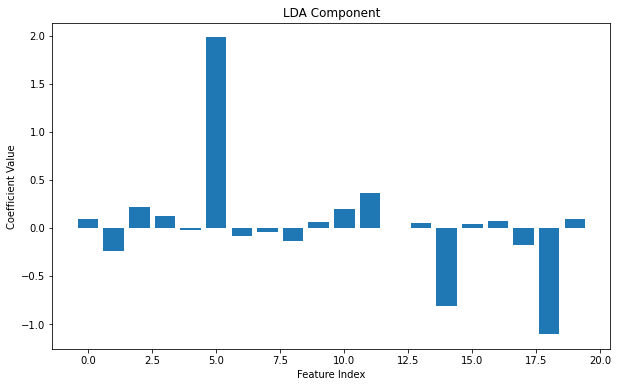

In [35]:
# Get the coefficients of the LDA transformation
lda_coefficients = lda.coef_

# Visualize the LDA component (coefficients)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(lda_coefficients[0])), lda_coefficients[0])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('LDA Component')
plt.show()


## Experiment excluding specific words
Excluding frequent political terms to see what emerges with the logaritmic probability <br>

chatGpt: Using the stop_words parameter in TfidfVectorizer to exclude specific words that are not considered stopwords is not the conventional use of the parameter. Typically, the stop_words parameter is used to exclude commonly occurring words such as "the," "and," "is," etc., which are considered stopwords because they do not carry significant meaning in the context of most natural language processing tasks.

However, if you have specific words that you want to exclude from your vocabulary for a particular reason (e.g., domain-specific terms that are not relevant to your analysis), you can still use the stop_words parameter to achieve this. Just keep in mind that the parameter is intended for excluding stopwords, so using it for other purposes might not be immediately intuitive to other users who are familiar with standard NLP practices.

Alternatively, you could preprocess your text data before passing it to the TfidfVectorizer to remove the specific words you want to exclude. This approach might provide more flexibility and clarity in your preprocessing pipeline.






In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Define a list of words to exclude
  # Add the words you want to exclude

# Initialize TfidfVectorizer with stop_words parameter
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=to_exclude)
X = vectorizer.fit_transform(df_combined['Text'])
y = df_combined['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)


C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['to', 'year'] not in stop_words.
  warnings.warn(


### Logaritmic probability difference

In [53]:
#Get the log probabilities of words for each class

log_probabilities = clf.feature_log_prob_


# Calculate the difference in log probabilities for each word

word_diff = log_probabilities[1] - log_probabilities[0] # Assuming binary classification, change the index accordingly


# Get the feature names (words) from the TfidfVectorizer

feature_names = vectorizer.get_feature_names_out()


# Create a dictionary that maps words to their differences in log probabilities

word_diff_dict = dict(zip(feature_names, word_diff))


# Sort the words by their differences in log probabilities

sorted_word_diff = {k: v for k, v in sorted(word_diff_dict.items(), key=lambda item: item[1], reverse=True)}


# Print the top 10 words

print("Logaritmic probability - Top 10 words after removal:")

for i, (word, diff) in enumerate(sorted_word_diff.items()):
    
    print(f"{i+1}. Word: {word}, Log Probability Difference: {diff}")

    if i == 20:

        break


Logaritmic probability - Top 10 words after removal:
1. Word: the court, Log Probability Difference: 0.6914081398073169
2. Word: help, Log Probability Difference: 0.67593986337506
3. Word: sputnik, Log Probability Difference: 0.6709556759806397
4. Word: gage, Log Probability Difference: 0.6686088469585645
5. Word: together, Log Probability Difference: 0.6686019567302672
6. Word: end, Log Probability Difference: 0.6639642516293307
7. Word: as to, Log Probability Difference: 0.6627586680729163
8. Word: damn, Log Probability Difference: 0.6572174302539775
9. Word: microwave, Log Probability Difference: 0.6571149673484697
10. Word: with their, Log Probability Difference: 0.6570685909993852
11. Word: with, Log Probability Difference: 0.6567391903616393
12. Word: chance, Log Probability Difference: 0.6550864406272847
13. Word: will, Log Probability Difference: 0.6550741471163377
14. Word: make, Log Probability Difference: 0.646943377631775
15. Word: elements, Log Probability Difference: 0.64

In [45]:
selector = SelectKBest(chi2, k=1000)
X_selected = selector.fit_transform(X_vectorized, y)
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf_sel = MultinomialNB()
clf_sel.fit(X_train_sel, y_train)
y_pred_sel = clf_sel.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test, y_pred_sel)
print(f"Accuracy after feature selection: {accuracy_sel}")


Accuracy after feature selection: 0.9039301310043668


it's not efficient in this way- better preprocessing is needed

NLTK for rempoving undesired vocabualry

In [68]:
import nltk
from nltk.tokenize import word_tokenize

# Sample text
text =(' ').join(list(df_combined['Text']))
# Words to exclude
exclude_words = to_exclude

# Tokenize the text
tokens = word_tokenize(text)

# Remove undesired words
filtered_tokens = [word for word in tokens if word.lower() not in exclude_words]

# Reconstruct the text
preprocessed_text = ' '.join(filtered_tokens)

print("Original Text:", text)
print("Preprocessed Text:", preprocessed_text)


Original Text: put your finger anywhere on a map of the world, and everywhere you will hear complaints that American officials are interfering in internal election processes. There are a lot of killers. You got a lot of killers. What, you think our country is so innocent? Well, I think that our country does plenty of killing, too, Joe. So, you know. There's a lot of stupidity going on in the world right now, Joe. A lot of killing going on. A lot of stupidity. And that's the way it is. But you didn't ask me that question, you asked me a different question. So that's fine. ok, but what about the alt left that came charging at the, as you say, the alt right? Do they have any semblance of guilt?...What about this? What about the fact that they came charging – they came charging with clubs in their hands swinging clubs? Do they have any problem? I think they do. Urgent action to prevent a pandemic is of course necessary and pressing. But the climate crisis represents a far graver and deadli

## testing the bayesian classificator on new data
Launching Bayesian classifier model on new texts (out of distribution).<br>
The new data are composed by 160 instances, 80 with label 0 + 80 with label 1

In [1]:
# Step 1: Read the plain text file
with open('..\\txt_for_classification\\yes_experiment_ood.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Step 2: Assign a common label to all non-empty lines
common_label = 0  # Replace with your actual label

# Step 3: Combine text and labels, skipping empty lines
combined_data = [(line.strip(), common_label) for line in lines if line.strip()]

# Step 4: Write the combined data to a new file
output_file_path = '..\csv\yes_experiment.csv'  # You can choose any format, e.g., CSV
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write('Text,Label\n')  # Writing header
    for line, label in combined_data:
        line=line.replace('"', '')
        output_file.write(f'"{line}",{label}\n')


In [2]:
# Step 1: Read the plain text file
with open('..\\txt_for_classification\\no_experiment_ood.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Step 2: Assign a common label to all non-empty lines
common_label = 0  # Replace with your actual label

# Step 3: Combine text and labels, skipping empty lines
combined_data = [(line.strip(), common_label) for line in lines if line.strip()]

# Step 4: Write the combined data to a new file
output_file_path = '..\\csv\\no_experiment.csv'  # You can choose any format, e.g., CSV
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write('Text,Label\n')  # Writing header
    for line, label in combined_data:
        line=line.replace('"', '')
        output_file.write(f'"{line}",{label}\n')


In [3]:
import pandas as pd
# Step 1: Combine the CSV files
df_positive_exp = pd.read_csv('..\\csv\\yes_experiment.csv')
df_negative_exp = pd.read_csv('..\\csv\\no_experiment.csv')

df_combined_exp = pd.concat([df_positive_exp, df_negative_exp], ignore_index=True)
df_combined_exp.to_csv('..\\csv\\joined_experiment_csv.csv')

In [10]:
# Assume 'new_texts' is a list containing new texts to be tested
#new_texts = [...]  

# Preprocess new texts
new_texts =  df_combined_exp['Text'] # Apply the same preprocessing steps as training data

# Vectorize new texts
X_new = vectorizer.transform(new_texts)

# Predict labels for new texts
y_pred_new = clf.predict(X_new)

# Print predicted labels
#print("Predicted labels for new texts:")
#for i, text in enumerate(new_texts):
    #print(f"Text {i + 1}: {text} - Predicted Label: {y_pred_new[i]}")
ground_truth_labels=df_combined_exp['Label']
# Optionally, evaluate predictions
# (You need ground truth labels for evaluation)
print('classification report:\n',classification_report(ground_truth_labels, y_pred_new))
print(f'Accuracy on new texts: {accuracy_score(ground_truth_labels, y_pred_new)}')
#print(f'Accuracy: {accuracy_score(y_test?, y_pred_new)}')


classification report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88       160
           1       0.00      0.00      0.00         0

    accuracy                           0.78       160
   macro avg       0.50      0.39      0.44       160
weighted avg       1.00      0.78      0.88       160

Accuracy on new texts: 0.78125


C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy diminishes of about 0.1 points : 0.78